# Data cleaning

In [1]:
import json
import pandas as pd
import time

In [2]:
d1 = "data/2021_11_11_17_59_Board_94B97E6BA7B0_PowerOnOff_1_u6zwow6t2f25togi_File_0.bmerawdata"
d2 = "data/2021_11_10_16_46_Board_94B97E6BA7B0_PowerOnOff_1_i3pwya3wka1j43oc_File_0.bmerawdata"
d = json.load(open(d2))

In [3]:
data = pd.DataFrame(d["rawDataBody"]["dataBlock"])
data.columns = [item['key'] for item in d["rawDataBody"]["dataColumns"]]
data["date"] = pd.to_datetime(data['real_time_clock'],unit='s')

In [29]:
d

{'configHeader': {'dateCreated': '2022-12-02T21:16:24.115Z',
  'appVersion': '1.7.1',
  'boardType': 'board_8',
  'boardMode': 'burn_in',
  'boardLayout': 'grouped'},
 'configBody': {'heaterProfiles': [{'id': 'heater_354',
    'timeBase': 140,
    'temperatureTimeVectors': [[320, 5],
     [100, 2],
     [100, 10],
     [100, 30],
     [200, 5],
     [200, 5],
     [200, 5],
     [320, 5],
     [320, 5],
     [320, 5]]}],
  'dutyCycleProfiles': [{'id': 'duty_5_10',
    'numberScanningCycles': 5,
    'numberSleepingCycles': 10}],
  'sensorConfigurations': [{'sensorIndex': 0,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 1,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 2,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 3,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 4,
    'heaterProfile': 'heater_354',
    '

In [26]:
df = data.describe().drop(columns=["sensor_index", "sensor_id","timestamp_since_poweron", "real_time_clock",
                             "scanning_enabled","label_tag", "error_code","heater_profile_step_index","fixed_label" ])

In [27]:
print(df.to_latex(escape=True))

\begin{tabular}{lrrrr}
\toprule
{} &   temperature &      pressure &  relative\_humidity &  resistance\_gassensor \\
\midrule
count &  18400.000000 &  18400.000000 &       18400.000000 &          1.840000e+04 \\
mean  &     36.072545 &   1014.772184 &          26.117367 &          4.981060e+06 \\
std   &      2.010091 &      0.316654 &           3.094530 &          9.435927e+06 \\
min   &     29.371206 &   1014.051208 &          20.457424 &          3.967762e+04 \\
25\%   &     34.599586 &   1014.520081 &          23.558842 &          1.830533e+05 \\
50\%   &     36.027401 &   1014.768982 &          25.777097 &          4.440590e+05 \\
75\%   &     37.741463 &   1014.993057 &          27.875109 &          4.790294e+06 \\
max   &     41.912571 &   1015.629333 &          39.547005 &          6.884034e+07 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_5141/3205930062.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(escape=True))


In [25]:
df

,temperature,pressure,relative_humidity,resistance_gassensor,heater_profile_step_index,fixed_label
count,18400.000000,18400.000000,18400.000000,1.840000e+04,18400.000000,18400.000000
mean,36.072545,1014.772184,26.117367,4.981060e+06,4.500000,1.494022
std,2.010091,0.316654,3.094530,9.435927e+06,2.872359,0.499978
min,29.371206,1014.051208,20.457424,3.967762e+04,0.000000,1.000000
25%,34.599586,1014.520081,23.558842,1.830533e+05,2.000000,1.000000
50%,36.027401,1014.768982,25.777097,4.440590e+05,4.500000,1.000000
75%,37.741463,1014.993057,27.875109,4.790294e+06,7.000000,2.000000
max,41.912571,1015.629333,39.547005,6.884034e+07,9.000000,2.000000


In [5]:
# fixing messed up labels, more details ask Kuba or Hania
data["fixed_label"] = 0
x = data.label_tag.to_list()
for i in range(1,len(x),1):
    if x[i-1] != x[i]:
        print(i)
data.loc[:4777, "fixed_label"] = 1
data.loc[4777:9200, "fixed_label"] = 2
data.loc[9200:13733, "fixed_label"] = 1
data.loc[13733:, "fixed_label"] = 2

4777
9200
13733


In [6]:
df = data[data.sensor_index == 1]
X = data[["temperature", "pressure", "relative_humidity"]]#, "resistance_gassensor"]]#, "heater_profile_step_index"]]
y = data["fixed_label"]

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = MLPClassifier(hidden_layer_sizes=(32,32,32), activation='logistic',
                    random_state=100, max_iter=200).fit(X_train, y_train)

clf.score(X_test, y_test)

0.8813043478260869

Confusion matrix, without normalization
[[2137  162]
 [ 384 1917]]
Normalized confusion matrix
[[0.92953458 0.07046542]
 [0.16688396 0.83311604]]


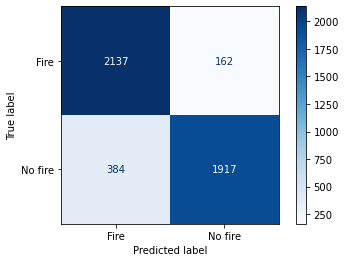

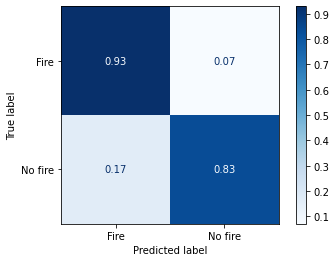

In [47]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = clf.predict(X_test)

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=["Fire", "No fire"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    #disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8813043478260869
0.8867219917012448
0.8476794922649742
0.9295345802522836


# Zapisywanie i wczytywanie modelu

In [36]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8813043478260869
